In [1]:
#!pip install torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#No null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df1 = df.copy()
df1['Outcome'] = np.where(df1['Outcome']==0,'Non Diabetic','Diabetic')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


<Figure size 1440x720 with 0 Axes>

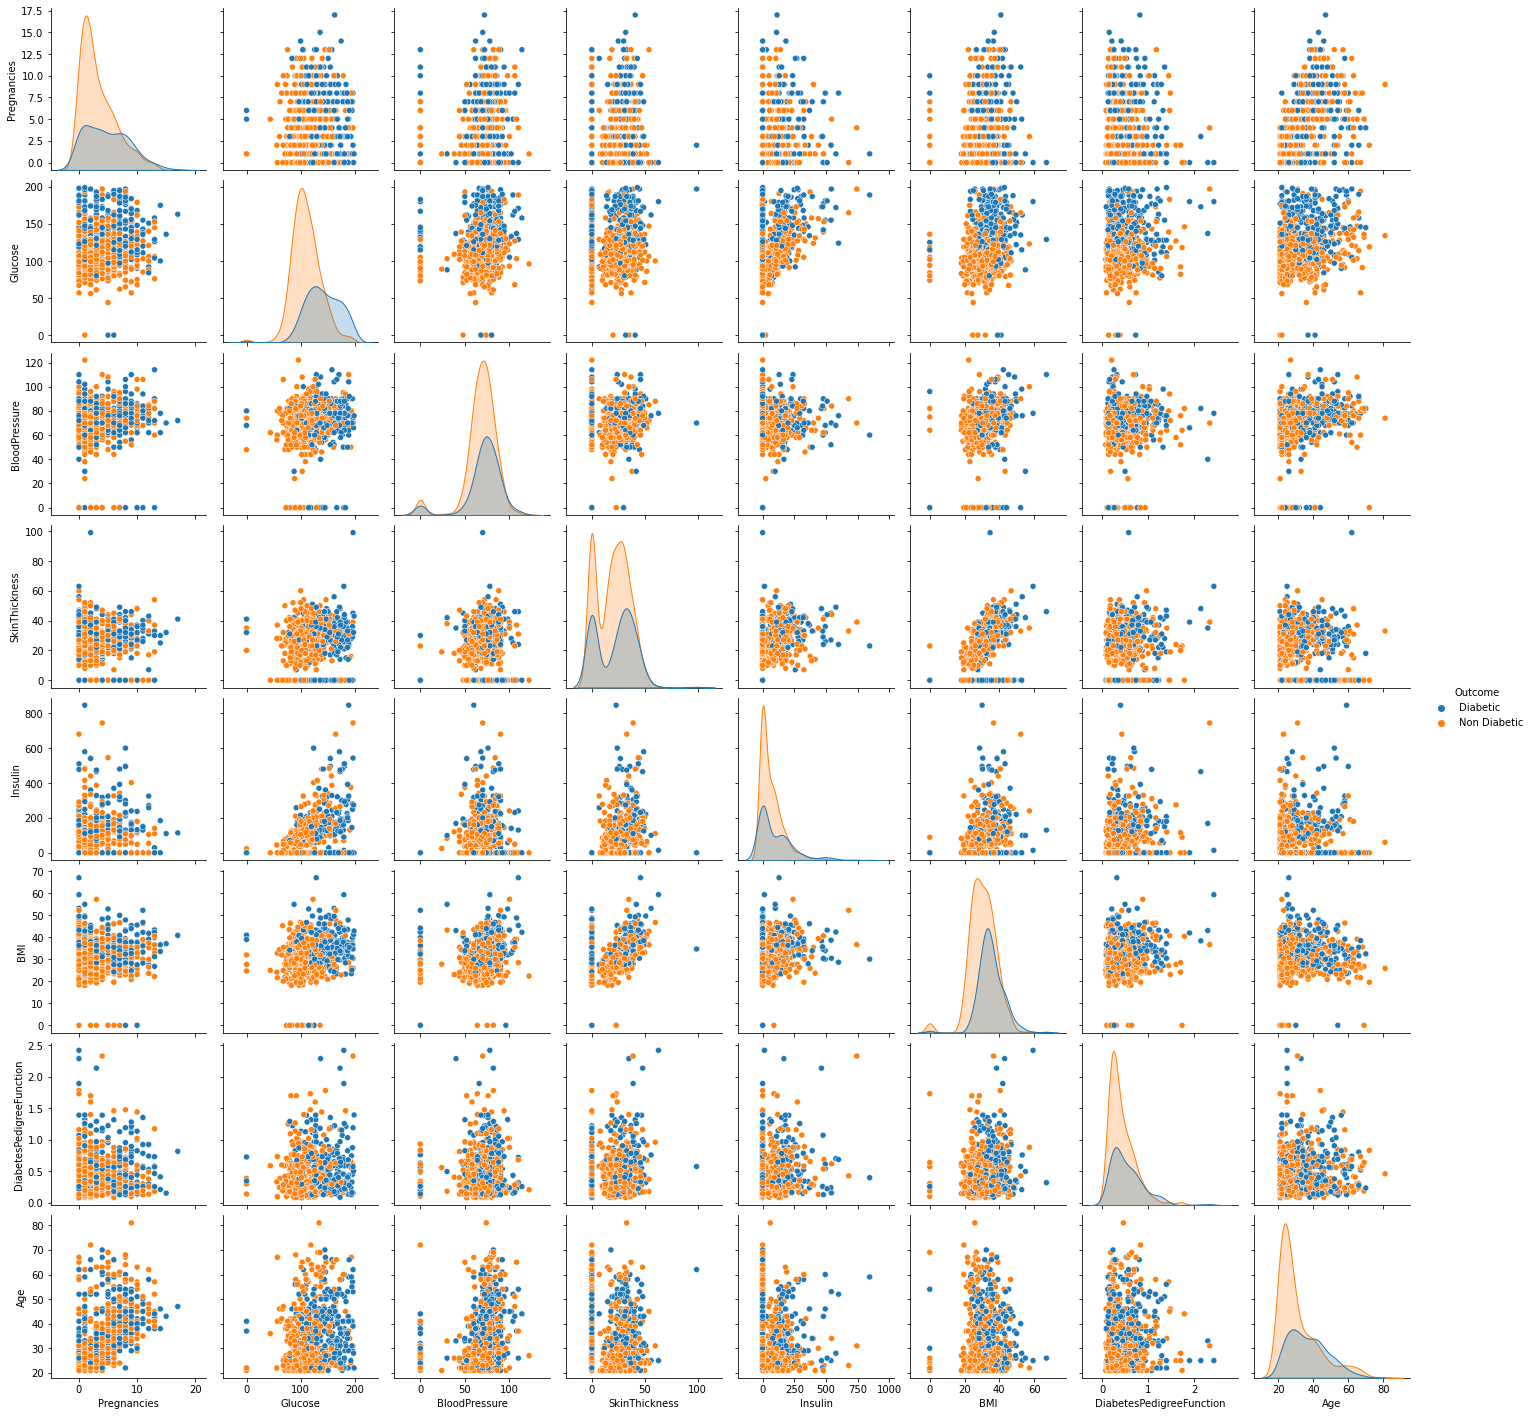

In [5]:
plt.figure(figsize=(20,10))
sns.pairplot(df1,hue='Outcome')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop(columns='Outcome',axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
## Creating Tensors
import torch.nn as nn
import torch.nn.functional as F

In [9]:
x_train = torch.FloatTensor(x_train.values)
x_test=torch.FloatTensor(x_test.values)


In [10]:
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [11]:
#Inheritance form parent module
class ANN_module(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [12]:
### instantiate ANN model
torch.manual_seed(29)
ann_model = ANN_module()

In [13]:
ann_model.parameters

<bound method Module.parameters of ANN_module(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [14]:
###Backward Prop
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann_model.parameters(),lr=0.01)

In [15]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred = ann_model.forward(x_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if(i%10==0):
        print("Epochs number {} and loss is {}".format(i,loss.item()))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs number 10 and loss is 0.8059968948364258
Epochs number 20 and loss is 0.6695776581764221
Epochs number 30 and loss is 0.6355502605438232
Epochs number 40 and loss is 0.6032025814056396
Epochs number 50 and loss is 0.5881921648979187
Epochs number 60 and loss is 0.5751197338104248
Epochs number 70 and loss is 0.565075695514679
Epochs number 80 and loss is 0.5562099814414978
Epochs number 90 and loss is 0.5487903952598572
Epochs number 100 and loss is 0.5401573777198792
Epochs number 110 and loss is 0.5311453938484192
Epochs number 120 and loss is 0.5222580432891846
Epochs number 130 and loss is 0.514655351638794
Epochs number 140 and loss is 0.5085208415985107
Epochs number 150 and loss is 0.5029271841049194
Epochs number 160 and loss is 0.4980437457561493
Epochs number 170 and loss is 0.49338191747665405
Epochs number 180 and loss is 0.4887859523296356
Epochs number 190 and loss is 0.4839710593223572
Epochs number 200 and loss is 0.4789483845233917
Epochs number 210 and loss is 

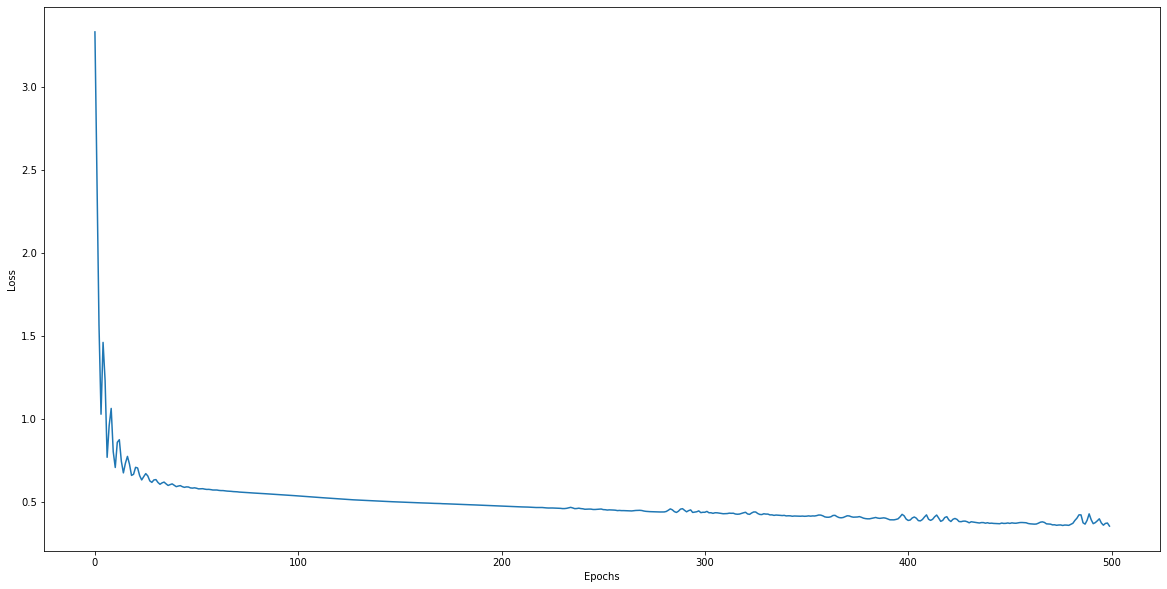

In [19]:
#plot loss function
final_losses
with torch.no_grad():
    plt.figure(figsize=(20,10))
    plt.plot(range(epochs),final_losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

In [21]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred = ann_model(data)
        predictions.append(y_pred.argmax().item())

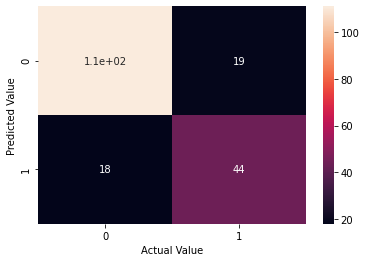

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8072916666666666

In [29]:
##Save model
torch.save(ann_model,'diabetes.pt')

In [32]:
model = torch.load('diabetes.pt')
model.eval()

ANN_module(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)